#What is LeNet 5?

#LeNet is a convolutional neural network that Yann LeCun introduced in 1989. LeNet is a common term for LeNet-5, a simple convolutional neural network.

#The LeNet-5 signifies CNN’s emergence and outlines its core components. However, it was not popular at the time due to a lack of hardware, especially GPU (Graphics Process Unit, a specialised electronic circuit designed to change memory to accelerate the creation of images during a buffer intended for output to a show device) and alternative algorithms, like SVM, which could perform effects similar to or even better than those of the LeNet.

#Features of LeNet-5

#Every convolutional layer includes three parts: convolution, pooling, and nonlinear activation functions

#Using convolution to extract spatial features (Convolution was called receptive fields originally)

#The average pooling layer is used for subsampling.

#‘tanh’ is used as the activation function

#Using Multi-Layered Perceptron or Fully Connected Layers as the last classifier

#The sparse connection between layers reduces the complexity of computation

#Architecture

#The LeNet-5 CNN architecture has seven layers. Three convolutional layers, two subsampling layers, and two fully linked layers make up the layer composition.

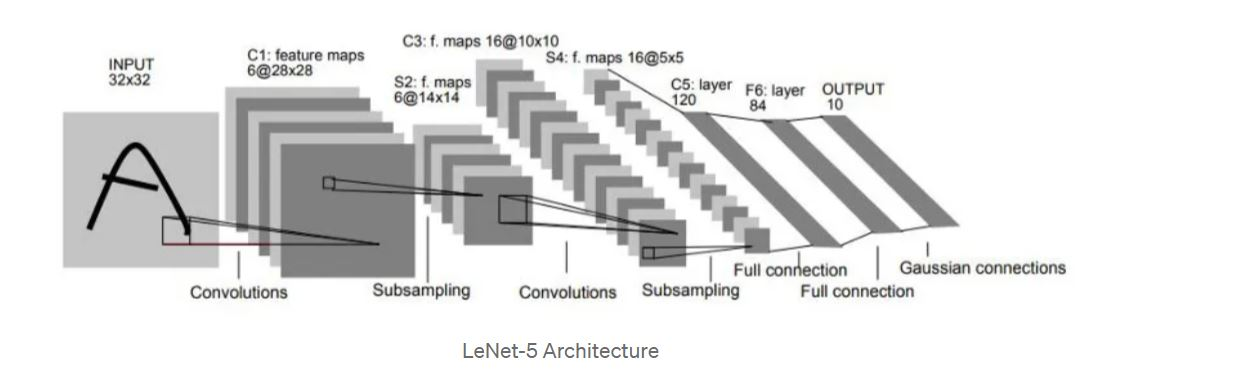

#First Layer

#A 32x32 grayscale image serves as the input for LeNet-5 and is processed by the first convolutional layer comprising six feature maps or filters with a stride of one. From 32x32x1 to 28x28x6, the image’s dimensions shift.

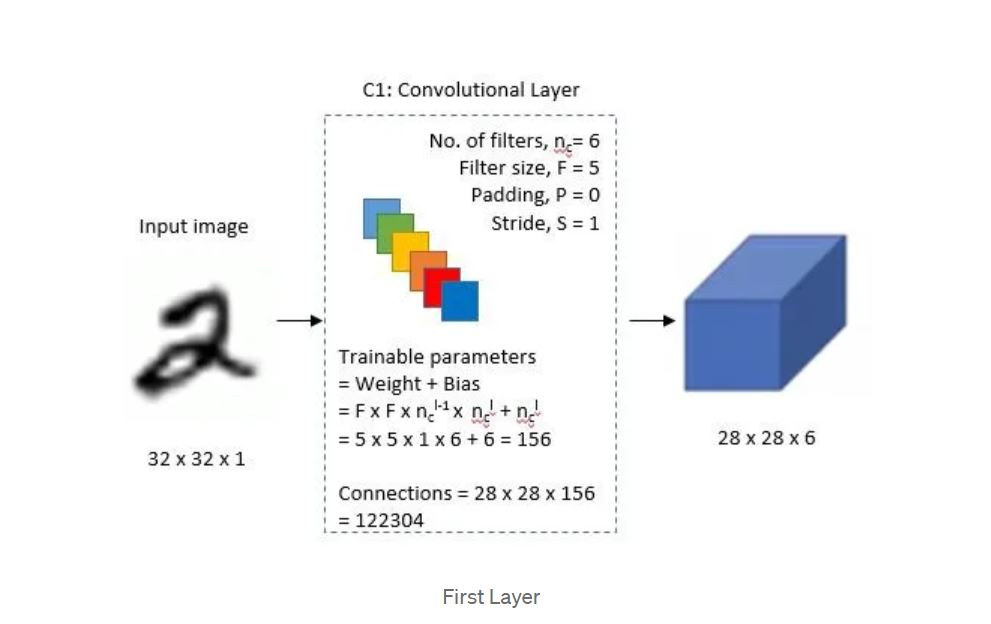

#Second Layer

#Then, using a filter size of 22 and a stride of 2, the LeNet-5 adds an average pooling layer or sub-sampling layer. 14x14x6 will be the final image’s reduced size.

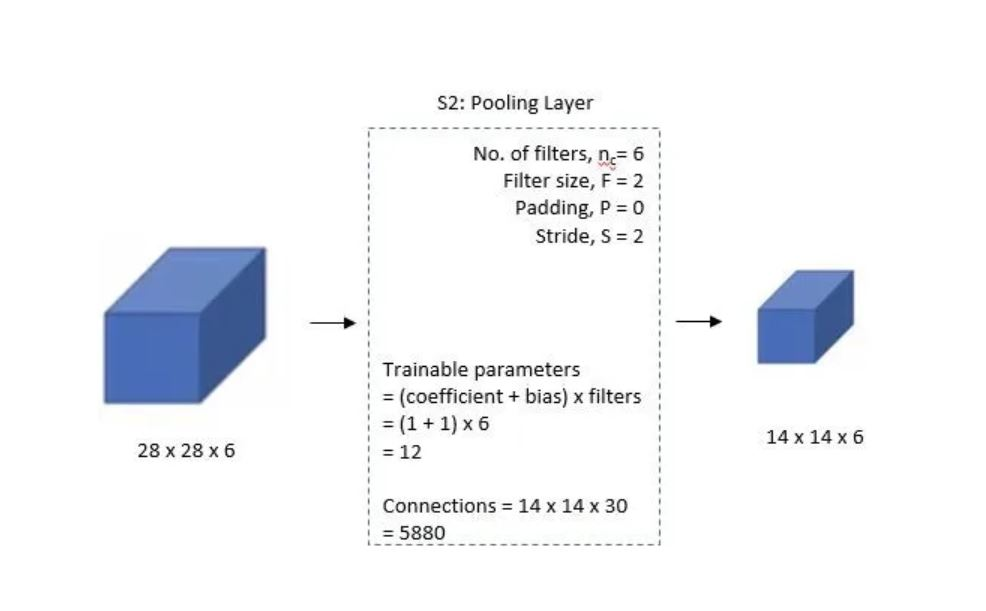

#Third Layer

#A second convolutional layer with 16 feature maps of size 55 and a stride of 1 is then present. Only 10 of the 16 feature maps in this layer are linked to the six feature maps in the layer below, as can be seen in the illustration below.

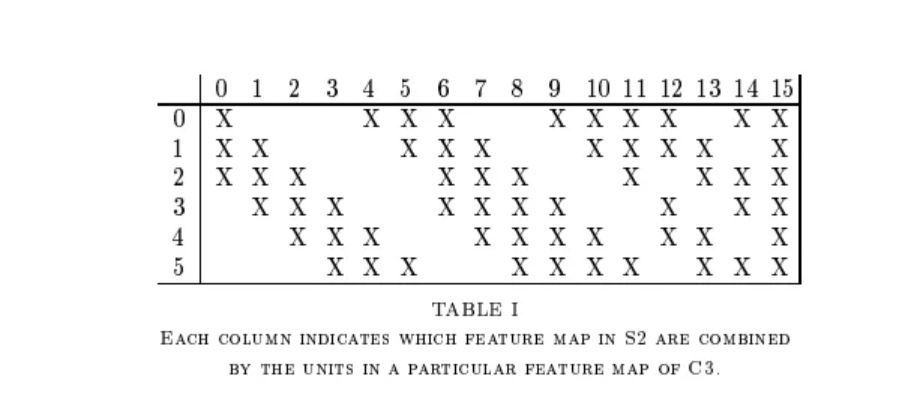

#The primary goal is to disrupt the network’s symmetry while maintaining a manageable number of connections. Because of this, there are 1516 training parameters instead of 2400 in these layers, and similarly, there are 151600 connections instead of 240000.

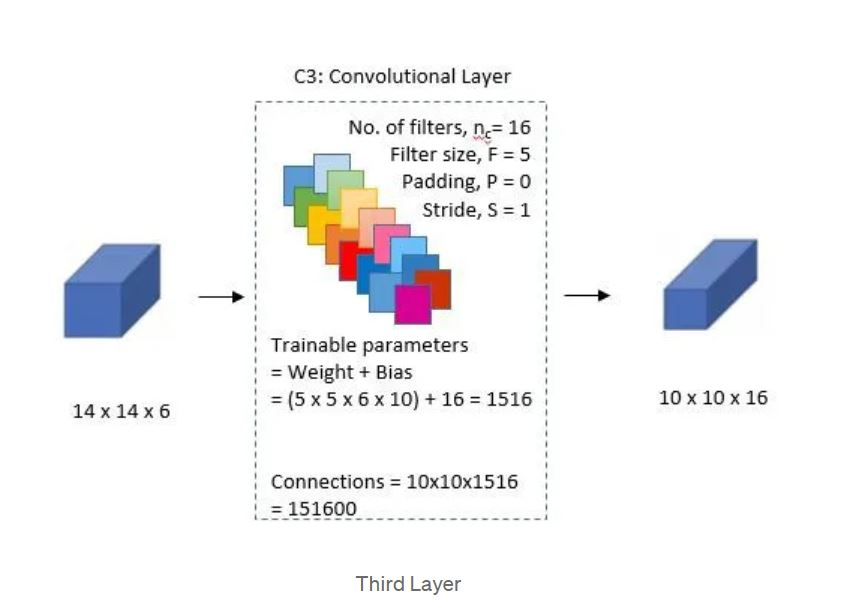

#Fourth Layer

#With a filter size of 22 and a stride of 2, the fourth layer (S4) is once more an average pooling layer. The output will be decreased to 5x5x16 because this layer is identical to the second layer (S2) but has 16 feature maps.

#Fourth Layer

#With a filter size of 22 and a stride of 2, the fourth layer (S4) is once more an average pooling layer. The output will be decreased to 5x5x16 because this layer is identical to the second layer (S2) but has 16 feature maps.



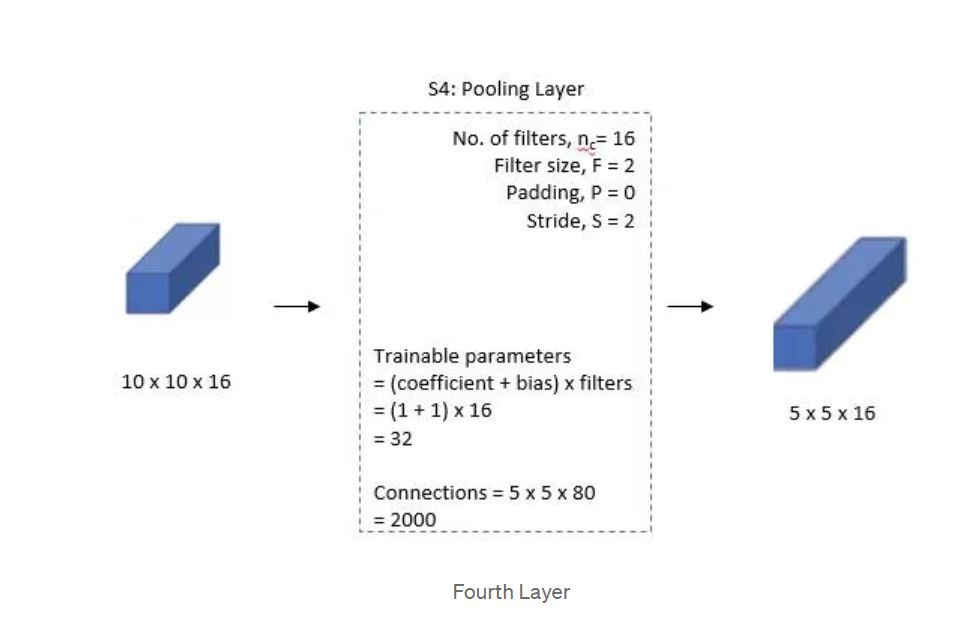

#Fifth Layer

#With 120 feature maps, each measuring 1 x 1, the fifth layer (C5) is a fully connected convolutional layer. All 400 nodes (5x5x16) in layer four, S4, are connected to each of the 120 units in C5’s 120 units.

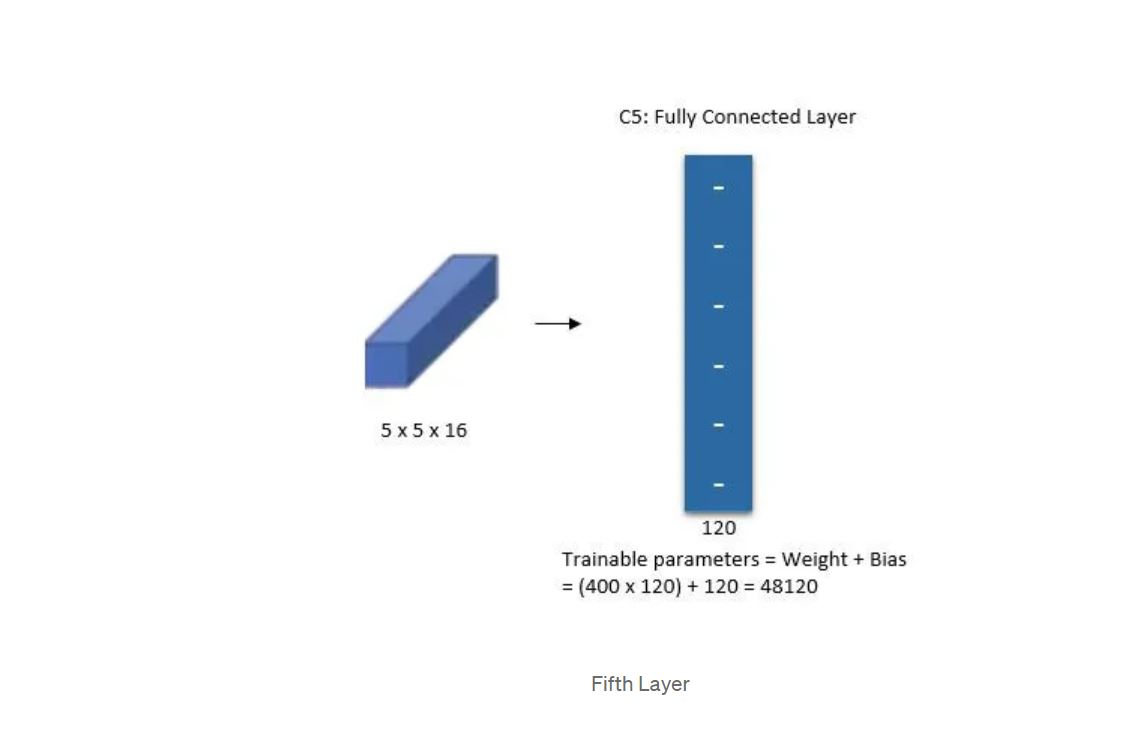

#Sixth Layer

#A fully connected layer (F6) with 84 units makes up the sixth layer.

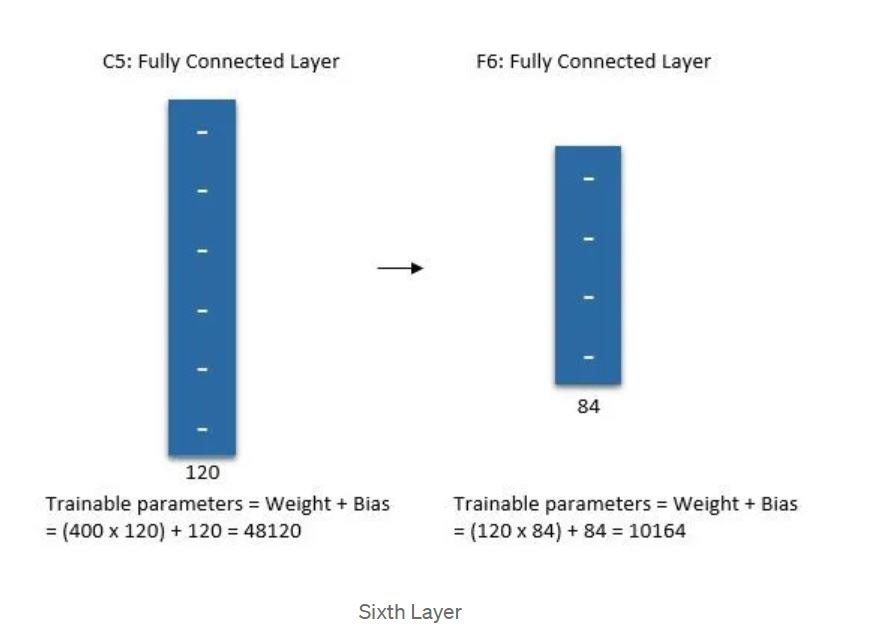

#Output Layer

#The SoftMax output layer, which has 10 potential values and corresponds to the digits 0 to 9, is the last layer.

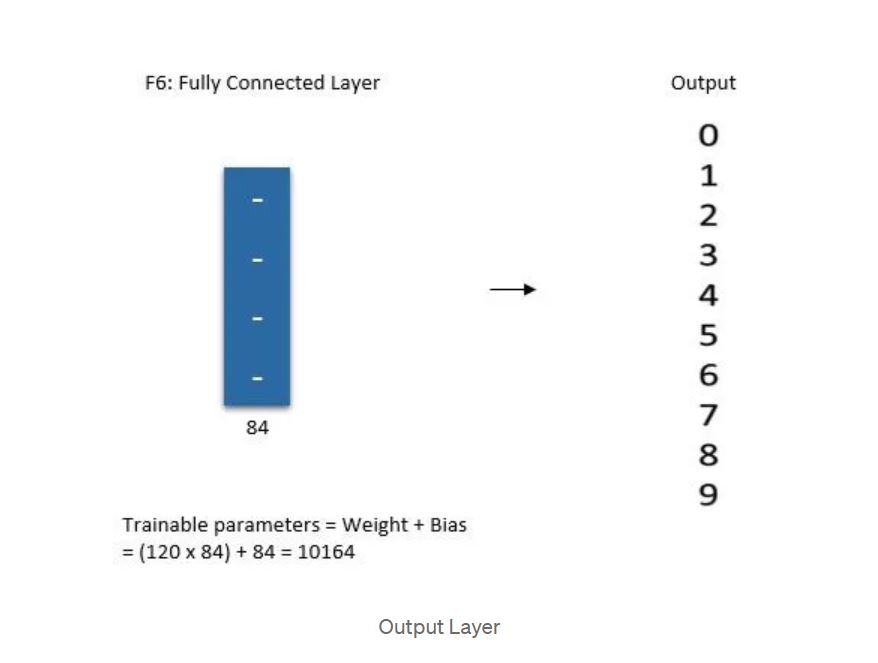

#Summary of LeNet-5 Architecture

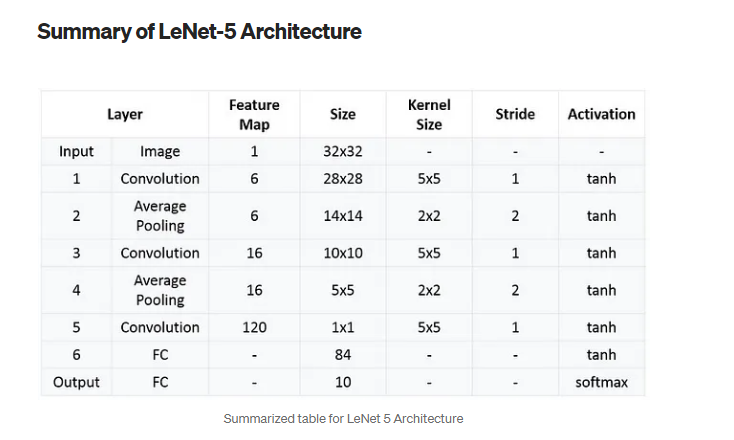

#Implementation
#Import Library

#Start with the code to implement LeNet-5 in TensorFlow using the Keras API. It’s a good beginning to work with the MNIST dataset.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from keras.models import Sequential
from tensorflow.keras.utils import plot_model

#Load Dataset

#Load the MNIST dataset for training and testing images. This function loads the dataset, which consists of handwritten digit images and their respective labels. The data is divided into training and testing sets.

In [ ]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#The reshape function in this context is adjusting the shape of the images to make them suitable for processing in a CNN. The shape (28, 28, 1) signifies that the images are 28×28 pixels and have a single channel (grayscale images). This transformation is necessary because most CNNs expect images to be in a specific shape, often represented as (width, height, channels).


In [ ]:
#perfoming reshape
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
# Check the shape of data
X_train.shape

(60000, 28, 28, 1)

#Normalization
#The code snippet you’ve provided normalizes the image pixel values in the training and testing datasets. Divining every pixel value by 255 ensures that the pixel values range from 0 to 1.

In [ ]:
# Normalization ---> convert 0 to 1
X_train = X_train/255
X_test = X_test/255

#One Hot Encoding

#The classes for the MNIST dataset are transformed into categorical data with 10 classes. Each label is converted into a vector where each element represents a class, with 1 in the index corresponding to the class and 0 elsewhere.

# One hot encoding


In [ ]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

CNN Architectures: LeNet, AlexNet, VGG, GoogLeNet, ResNet and more…

#Model Build

#This code snippet demonstrates constructing the LeNet-5 model using the Keras Sequential API in TensorFlow. It defines the layers and their configurations and compiles the model with an optimizer, loss function, and metrics for evaluation.

In [ ]:
model = Sequential()
# first layer
model.add(Conv2D(6, kernel_size=(5,5), padding="valid", activation="tanh", input_shape =(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2, padding='valid'))

#second layer
model.add(Conv2D(16, kernel_size=(5,5), padding="valid", activation="tanh"))
model.add(AveragePooling2D(pool_size=(2,2),strides=2, padding='valid'))

# flatten layer
model.add(Flatten())

# ANN
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

#Model Compile
#The “compile” method prepares the model for training by defining its optimization method, loss function, and the metrics to monitor.

In [ ]:
model.compile(loss= keras.metrics.categorical_crossentropy, optimizer =keras.optimizers.Adam(),\
metrics= ['accuracy'])

#Model training: The “fit ” function trains the model using the provided training data and validates it using the test data.

In [12]:
predictions=model.fit(X_train,y_train, batch_size=128,epochs=10 , verbose=1, validation_data=(X_test,y_test))

Epoch 1/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0490 - val_accuracy: 0.9850
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0449 - val_accuracy: 0.9849
Epoch 3/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0470 - val_accuracy: 0.9853
Epoch 4/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0458 - val_accuracy: 0.9855
Epoch 5/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0494 - val_accuracy: 0.9850
Epoch 6/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0532 - val_accuracy: 0.9838
Epoch 7/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.0491 - val_accuracy:

#Model Evaluation

#The model “evaluate()” function is utilized to evaluate the model’s performance on a test dataset. The result provides the test loss and test accuracy.

In [13]:
score = model.evaluate(X_test,y_test)

print('Test loss', score[0])
print('Test Accuracy', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0497 - accuracy: 0.9858
Test loss 0.04965784400701523
Test Accuracy 0.98580002784729


#Visualization:

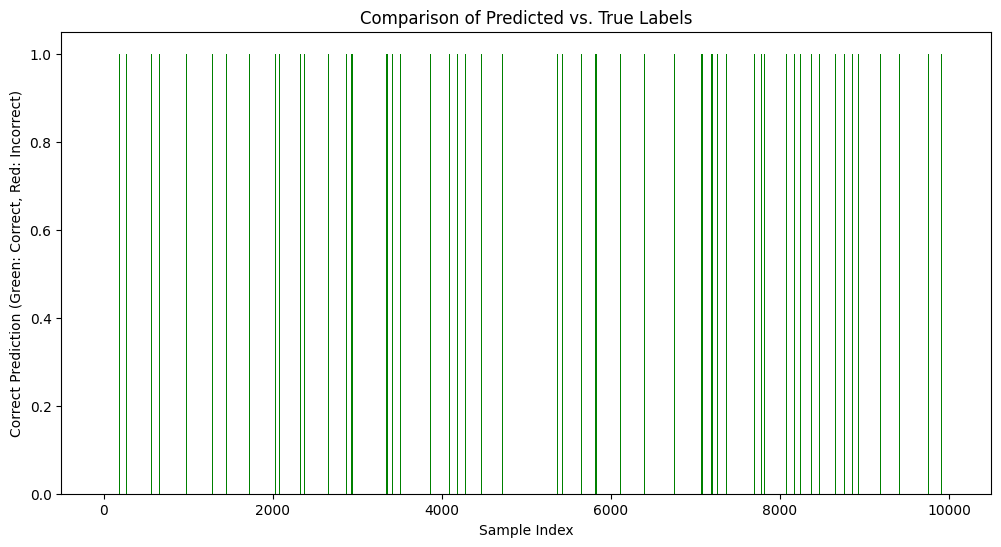

In [17]:
# Create a bar chart to visualize the comparison
import matplotlib.pyplot as plt
import numpy as np
predicted_labels = np.argmax(predictions)
# Compare predicted labels with true labels
correct_predictions = np.equal(predicted_labels, np.argmax(y_test, axis=1))
plt.figure(figsize=(12, 6))
plt.bar(range(len(y_test)), correct_predictions, \
color=['green' if c else 'red' for c in correct_predictions])
plt.title('Comparison of Predicted vs. True Labels')
plt.xlabel('Sample Index')
plt.ylabel('Correct Prediction (Green: Correct, Red: Incorrect)')
plt.show()

#Impact and Significance of LeNet

#LeNet’s influence extends far beyond its original task. Its success paved the way for deeper exploration into convolutional neural networks (CNNs). Its efficient design and performance on digit recognition tasks set the stage for advancements in various computer vision applications, including image classification, object detection, and facial recognition.

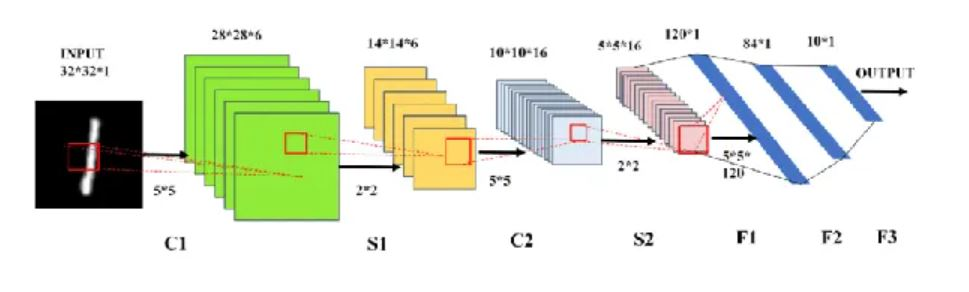

#Revolution in Handwritten Character Recognition: LeNet-5’s success in recognizing handwritten digits and characters led to a transformation in various practical applications, particularly in recognizing postal zip codes and checks. Its ability to recognize characters accurately contributed to these applications’ widespread adoption of neural networks.

#Influence on Future Architectures: LeNet’s architectural design principles laid the foundation for numerous subsequent CNN models. Its innovative use of convolution, subsampling, and fully connected layers inspired the development of more complex and sophisticated neural network architectures for various image-based tasks.

#Promoting Deep Learning: LeNet-5’s success demonstrated the potential of deep learning networks in image recognition, inspiring further research and development in the field. Its impact on the research community led to a paradigm shift towards using deep neural networks for various vision-based tasks and laid the groundwork for subsequent advancements in the domain.

#Application of LeNet

#The impact of LeNet extends to numerous real-world applications. From recognizing handwritten digits in postal services to revolutionizing healthcare by aiding in medical image analysis, the foundational concepts of LeNet have influenced a myriad of fields.

#Document Processing: LeNet’s capabilities have found usage in scanning and analyzing documents, parsing and processing different types of information, extracting data from documents, and automating data entry tasks in various industries.

#Handwriting Recognition: LeNet’s success in recognizing handwritten characters and digits remains fundamental in Optical Character Recognition (OCR) systems used in processing handwritten text in bank checks, postal services, and forms. It’s applicable in digitizing historical documents and recognizing hand-written information in various formats.

#Biometric Authentication: Handwriting recognition capabilities of LeNet have been applied to signature and fingerprint analysis, enabling biometric authentication methods and enhancing security systems.

#Real-time Video Analysis: The foundational concepts in LeNet serve as a basis for real-time video analysis, such as object tracking, surveillance systems, facial recognition, and autonomous vehicles.

#Image Classification: LeNet’s principles influence modern image classification systems. Applications include classifying and categorizing objects in images for numerous domains, such as identifying objects in photographs, quality control in manufacturing, medical imaging analysis, and security systems for object identification.

#Challenges and Limitations of LeNet
#Feature Extraction Efficiency: With the evolution of neural network architectures, newer models have more efficient ways of feature extraction, making LeNet comparatively less efficient in identifying intricate patterns and features.

#Limited Adaptability: Its architecture, designed for specific tasks such as handwritten character recognition, might not be directly transferable to other domains without substantial modifications.

#Scalability: Although a pioneering model, LeNet might lack the scalability to adapt to modern data processing and deep learning demands.

#Overfitting: LeNet might suffer from overfitting when dealing with more complex datasets, necessitating additional regularization techniques to mitigate this issue.